<a href="https://colab.research.google.com/github/Fatehbs/AI-applications/blob/main/Evolutionary_Game_Theory_(Marriage).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
man_payoff = pd.DataFrame(
    data = [[2, 0], [0, 1]],
    index = ['Cricket', 'Dance'],
    columns = ['Cricket', 'Dance']
)

woman_payoff = pd.DataFrame(
    data = [[1, 0], [0, 2]],
    index = ['Cricket', 'Dance'],
    columns = ['Cricket', 'Dance']
)

In [ ]:
man_payoff

,Cricket,Dance
Cricket,2,0
Dance,0,1


In [ ]:
woman_payoff

,Cricket,Dance
Cricket,1,0
Dance,0,2


In [ ]:
#Payoff Matrix of Player A
A = man_payoff.values

#Payoff Matrix of Player B
B = woman_payoff.values

In [ ]:
pA = np.ones((2,)) / 2
pB = np.ones((2,)) / 2

pA_next = pA.copy()
pB_next = pB.copy()

In [ ]:
def step_A():
    global pA_next
    fA = np.matmul(A, pB)
    fA_av = np.dot(pA, fA)

    mu_A = fA - fA_av
    pA_next = pA * np.exp(mu_A)

    pA_next = pA_next / np.sum(pA_next)

In [ ]:
def step_B():
    global pB_next
    fB = np.matmul(B, pA)
    fB_av = np.dot(pB, fB)

    mu_B = fB - fB_av
    pB_next = pB * np.exp(mu_B)

    pB_next = pB_next / np.sum(pB_next)

In [ ]:
def step():
    global pA
    global pB

    step_A()
    step_B()

    pA = pA_next
    pB = pB_next

In [ ]:
for _ in range(10):
    step()

In [ ]:
prob_df = pd.DataFrame(np.reshape(pA, (2, 1)) * np.reshape(pB, (1, 2)),
          index = ['Cricket', 'Dance'],
          columns = ['Cricket', 'Dance']
)

prob_df.index.name = 'Man'
prob_df.columns.name = 'Woman'

<Axes: xlabel='Woman', ylabel='Man'>

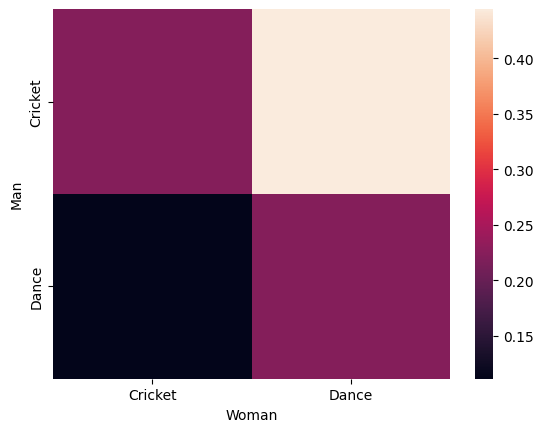

In [ ]:
sns.heatmap(prob_df)